<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/main/Desicion_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("caTools")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘bitops’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/bitops_1.0-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 10809 bytes (10 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [3]:
%%R

install.packages("party")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/TH.data_1.1-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 8619076 bytes (8.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [4]:
%%R
library(datasets)
library(caTools)
library(party)
library(dplyr)
library(magrittr)

R[write to console]: Loading required package: grid

R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: modeltools

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: strucchange

R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


R[write to console]: Loading required package: sandwich

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
%%R
data("readingSkills")
head(readingSkills)

  nativeSpeaker age shoeSize    score
1           yes   5 24.83189 32.29385
2           yes   6 25.95238 36.63105
3            no  11 30.42170 49.60593
4           yes   7 28.66450 40.28456
5           yes  11 31.88207 55.46085
6           yes  10 30.07843 52.83124


Факторы: nativeSpeaker, age, shoeSize и score. Таким образом, мы собираемся выяснить, является ли человек носителем языка или нет, используя другие критерии, и посмотреть точность разработанной модели дерева решений.

In [ ]:
%%R
sample_data = sample.split(readingSkills, SplitRatio = 0.8)
train_data <- subset(readingSkills, sample_data == TRUE)
test_data <- subset(readingSkills, sample_data == FALSE)

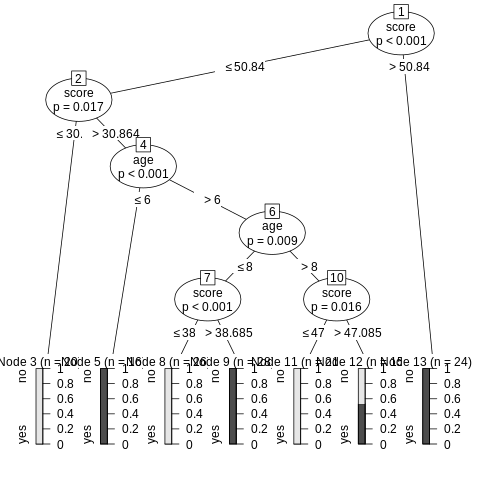

In [ ]:
%%R
ctree_ <- ctree(nativeSpeaker ~ ., train_data)
plot(ctree_)

In [ ]:
%%R

# testing the people who are native speakers
# and those who are not
predict_model <- predict(ctree_, test_data)
 


In [ ]:
%%R

# creates a table to count how many are classified
# as native speakers and how many are not
m_at <- table(test_data$nativeSpeaker, predict_model)
m_at

     predict_model
      no yes
  no  24   2
  yes  0  24


In [ ]:
%%R


ac_Test <- sum(diag(m_at)) / sum(m_at)
print(paste('Accuracy for test is found to be', ac_Test))

[1] "Accuracy for test is found to be 0.96"


RandomForest

In [ ]:
%%R

# Loading data
data(iris)
  
# Structure 
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
%%R

install.packages("randomForest")

R[write to console]: Installing package into ‘/root/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/randomForest_4.6-14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80074 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine




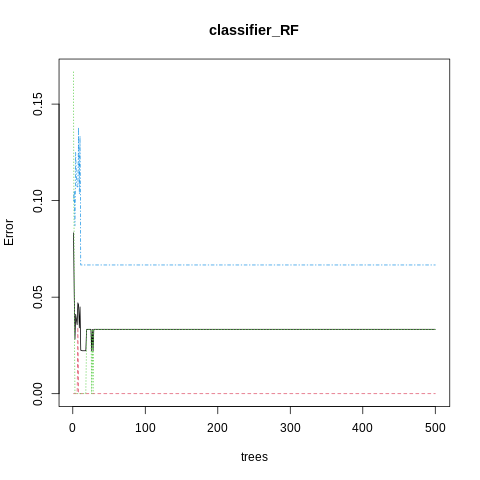

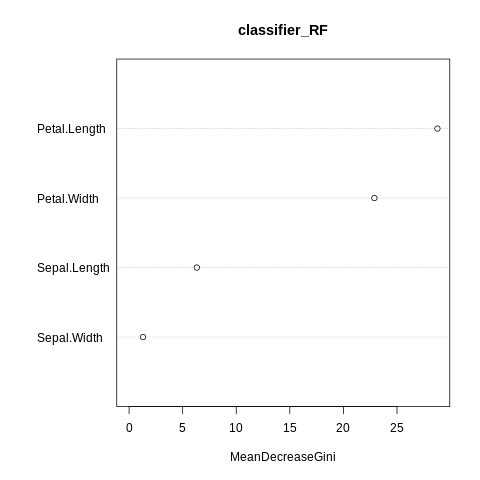

In [ ]:
%%R

# Loading package
library(caTools)
library(randomForest)
  
# Splitting data in train and test data
split <- sample.split(iris, SplitRatio = 0.7)
split
  
train <- subset(iris, split == "TRUE")
test <- subset(iris, split == "FALSE")
  
# Fitting Random Forest to the train dataset
set.seed(120)  # Setting seed
classifier_RF = randomForest(x = train[-5],
                             y = train$Species,
                             ntree = 500)
  
classifier_RF
  
# Predicting the Test set results
y_pred = predict(classifier_RF, newdata = test[-5])
  
# Confusion Matrix
confusion_mtx = table(test[, 5], y_pred)
confusion_mtx
  
# Plotting model
plot(classifier_RF)
  
# Importance plot
importance(classifier_RF)
  
# Variable importance plot
varImpPlot(classifier_RF)


In [ ]:
%%R

classifier_RF


Call:
 randomForest(x = train[-5], y = train$Species, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3.33%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         30          0         0  0.00000000
versicolor      0         29         1  0.03333333
virginica       0          2        28  0.06666667
